### Homework 4 Appendix

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import \
     (KMeans,
      AgglomerativeClustering)
from scipy.cluster.hierarchy import \
     (dendrogram,
      cut_tree)
from ISLP.cluster import compute_linkage

### 1.0 Load and Process Dataset

In [3]:
# Load the dataset
phishingurl_data = pd.read_csv("C:\\Users\\david\\Downloads\\phiusiil+phishing+url+dataset\\PhiUSIIL_Phishing_URL_Dataset.csv")

In [14]:
phishingurl_data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


### 1.1 Check for Missing Values

In [4]:
phishingurl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

There appears to be no missing values in the dataset.  We believe this is because the URLs were gathered by a program and if an item wasn't present on the website, like a password field, the program appropriately labeled it as a 0.

### 1.2 Check the Mean and Variance for Scaling

In [7]:
# There are too many records for these scripts to run in a reasonable amount of time
# So, we take a random sample of 5000 records
url_sample = phishingurl_data.sample(5000, random_state=13)

# Drop text fields: Filename, URL, Domain, TLD, Title
url_sample_data = url_sample.drop(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'],axis = 1)

In [8]:
# Check the Mean
url_sample_data.mean()

URLLength                        34.165200
DomainLength                     21.242800
IsDomainIP                        0.003600
URLSimilarityIndex               78.814404
CharContinuationRate              0.847829
TLDLegitimateProb                 0.257006
URLCharProb                       0.055631
TLDLength                         2.768600
NoOfSubDomain                     1.153800
HasObfuscation                    0.001200
NoOfObfuscatedChar                0.008400
ObfuscationRatio                  0.000087
NoOfLettersInURL                 19.100800
LetterRatioInURL                  0.513347
NoOfDegitsInURL                   1.847600
DegitRatioInURL                   0.028853
NoOfEqualsInURL                   0.057600
NoOfQMarkInURL                    0.026800
NoOfAmpersandInURL                0.028200
NoOfOtherSpecialCharsInURL        2.285800
SpacialCharRatioInURL             0.062861
IsHTTPS                           0.790000
LineOfCode                     1083.973000
LargestLine

In [9]:
# Check the Variance
url_sample_data.var()

URLLength                     9.639991e+02
DomainLength                  7.859637e+01
IsDomainIP                    3.587758e-03
URLSimilarityIndex            8.305884e+02
CharContinuationRate          4.683432e-02
TLDLegitimateProb             6.303754e-02
URLCharProb                   1.178379e-04
TLDLength                     3.595259e-01
NoOfSubDomain                 3.402136e-01
HasObfuscation                1.198800e-03
NoOfObfuscatedChar            7.554455e-02
ObfuscationRatio              7.249281e-06
NoOfLettersInURL              5.054029e+02
LetterRatioInURL              1.549070e-02
NoOfDegitsInURL               5.503058e+01
DegitRatioInURL               5.150852e-03
NoOfEqualsInURL               3.083439e-01
NoOfQMarkInURL                3.488874e-02
NoOfAmpersandInURL            3.862820e-01
NoOfOtherSpecialCharsInURL    7.612841e+00
SpacialCharRatioInURL         1.007368e-03
IsHTTPS                       1.659332e-01
LineOfCode                    4.996780e+06
LargestLine

The columns for lines of code and largest line length are very high compared to the other variables.  We should scale this data before performing PCA, SVD, or Kmeans on it.

### 1.3 Scaling the Data

In [23]:
# Drop true / false values
X = url_sample_data.drop(['HasObfuscation', 
                          'IsDomainIP', 
                          'HasTitle', 
                          'HasFavicon', 
                          'HasExternalFormSubmit', 
                          'HasSocialNet', 
                          'HasSubmitButton', 
                          'HasHiddenFields', 
                          'HasPasswordField', 
                          'HasCopyrightInfo', 
                          'label'],axis = 1)

# Scale the dataset
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [24]:
X_scaled.head()

,URLLength,DomainLength,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,...,NoOfiFrame,Bank,Pay,Crypto,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,-0.005321,0.649462,0.735176,0.703224,1.059164,0.759941,0.385959,-0.263708,-0.030565,-0.032316,...,0.268683,-0.374154,1.815360,-0.160784,-0.047106,-0.187059,0.227526,-0.310491,-0.205827,-0.276248
1,-0.391854,-0.704242,0.735176,0.703224,1.059164,0.676517,0.385959,-0.263708,-0.030565,-0.032316,...,0.073561,-0.374154,-0.550855,-0.160784,0.090345,0.084146,-0.027481,0.507636,-0.205827,-0.238319
2,-0.101954,0.311036,-0.110058,0.703224,1.059164,0.295704,0.385959,-0.263708,-0.030565,-0.032316,...,-0.316683,-0.374154,-0.550855,-0.160784,-0.398370,-0.548666,-0.452494,-0.429252,-0.205827,-0.374861
3,-0.456276,-0.929859,0.735176,0.703224,-0.991071,0.708708,-1.281972,-0.263708,-0.030565,-0.032316,...,0.073561,2.672699,1.815360,6.219529,-0.184557,-0.096658,0.057521,-0.303893,-0.019000,-0.207977
4,1.701865,-0.253007,-2.205229,0.703224,1.059164,-2.292355,0.385959,-1.978327,-0.030565,-0.032316,...,-0.316683,-0.374154,1.815360,-0.160784,-0.383098,-0.458264,-0.452494,-0.422654,-0.205827,-0.367276


### 2.0 PCA

In [25]:
# Perform PCA
pca = PCA()
pca_out = pca.fit_transform(X_scaled)

### 2.1 PCA Principal Components

In [26]:
pd.DataFrame({'Center': scaler.mean_
                   , 'Scale': scaler.scale_}
                  , index=X_scaled.columns)

,Center,Scale
URLLength,34.165200,31.045230
DomainLength,21.242800,8.864573
URLSimilarityIndex,78.814404,28.817049
CharContinuationRate,0.847829,0.216391
TLDLegitimateProb,0.257006,0.251048
URLCharProb,0.055631,0.010854
TLDLength,2.768600,0.599545
NoOfSubDomain,1.153800,0.583220
NoOfObfuscatedChar,0.008400,0.274826
ObfuscationRatio,0.000087,0.002692


In [27]:
print("Number of Principal Components:", pca.n_components_)

Number of Principal Components: 40


(0.0, 1.03)

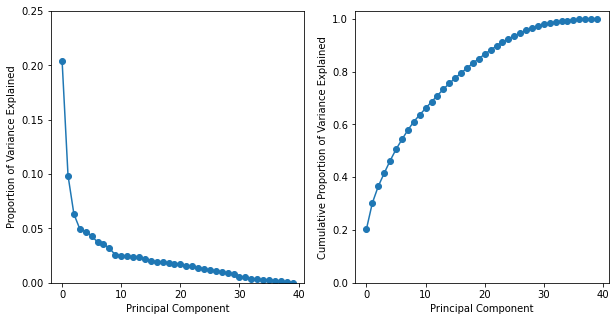

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot of proportion of variance explained
ax[0].plot(pca.explained_variance_ratio_, marker='o')
ax[0].set_xlabel('Principal Component')
ax[0].set_ylabel('Proportion of Variance Explained')
ax[0].set_ylim(0, 0.25)

# Plot of cumulative proportion of variance explained
ax[1].plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Cumulative Proportion of Variance Explained')
ax[1].set_ylim(0, 1.03)

### 3.0 SVD

In [17]:
# Perform SVD
U, s, V = np.linalg.svd(X_scaled, full_matrices=False)

In [19]:
s.shape

(40,)

### 3.1 SVD Principal Components

Text(0.5, 0, 'Principal Component')

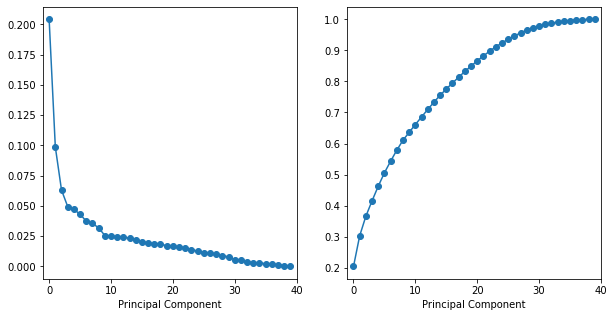

In [20]:
# Find the explained variance
explained_variance_ratio = (s ** 2) / np.sum(s ** 2)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot of singular values
ax[0].plot(explained_variance_ratio, marker='o')
ax[0].set_xlim(-1, 40)
ax[0].set_xlabel('Principal Component')
ax[1].plot(np.cumsum(explained_variance_ratio), marker='o')
ax[1].set_xlim(-1, 40)
ax[1].set_xlabel('Principal Component')

### Kmeans Testing

In [40]:
kmeans = KMeans(n_clusters=2,
                random_state=2,
                n_init=20).fit(X_scaled)

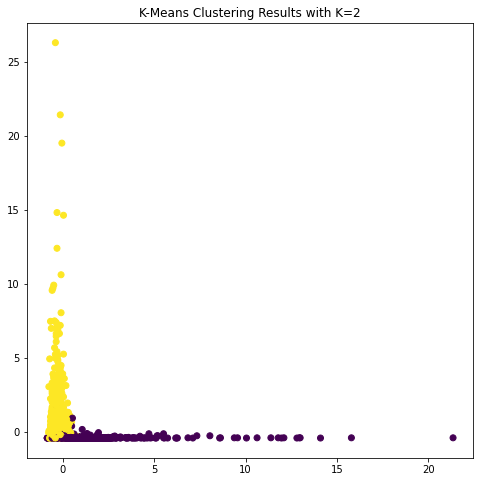

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X_scaled['NoOfLettersInURL'], X_scaled['NoOfImage'], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

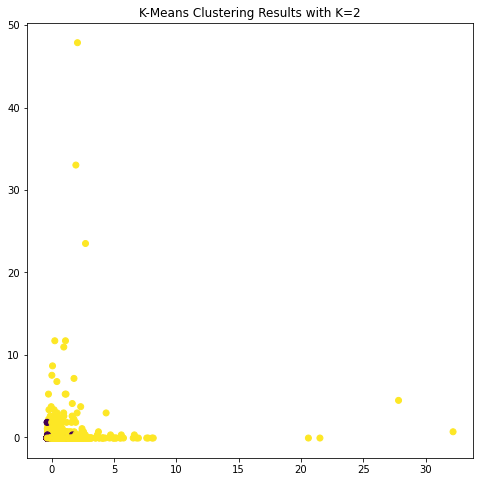

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X_scaled['NoOfExternalRef'], X_scaled['NoOfPopup'], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

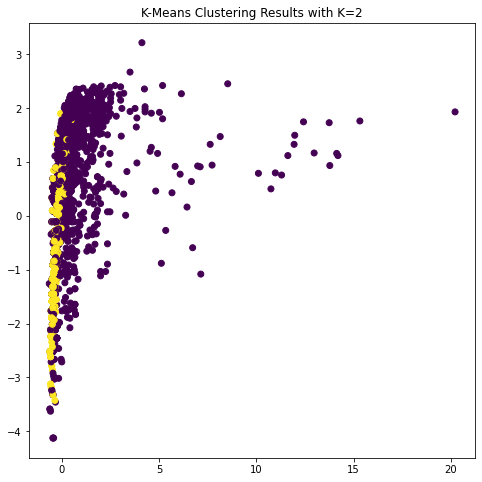

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X_scaled['URLLength'], X_scaled['LetterRatioInURL'], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");